sample code for ANN     IRAN-AI.IR     BY:KAZEMDELSOOZ

# TENSORFLOW

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import numpy

# load data    dataset : fashion_minst

In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,ytest)=fashion_mnist.load_data()

In [4]:
print(x_train_full.shape)
print(x_train_full.dtype)


(60000, 28, 28)
uint8


# split data train,valid and test

In [5]:
x_valid, x_train=x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names=["T-shirt/top", "Trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [7]:
print(y_train[0])
result=class_names[y_train[0]]
print(result)

4
coat


# Design model

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers
hidden1=model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1

True

In [11]:
weights, biases=hidden1.get_weights()
weights

array([[-0.00927402,  0.06669773, -0.07371167, ..., -0.07427902,
         0.03261346,  0.0520336 ],
       [-0.04238309, -0.00065023,  0.0669224 , ...,  0.04015389,
         0.03431409,  0.0321176 ],
       [-0.02988112,  0.07247168,  0.00728352, ...,  0.03630025,
        -0.04947776, -0.01981929],
       ...,
       [ 0.01741529, -0.07170066,  0.03894963, ...,  0.06864256,
         0.06932983,  0.06855164],
       [ 0.01621481,  0.04790297, -0.00315283, ...,  0.02159999,
        -0.00434219,  0.05196443],
       [-0.01387671, -0.06823167,  0.06286858, ...,  0.07218558,
        -0.05071174, -0.06066772]], dtype=float32)

In [12]:
weights.shape

(784, 300)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
biases.shape

(300,)

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

# Train model

In [16]:
history=model.fit(x_train, y_train, epochs=30,
                 validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7301 - accuracy: 0.7596 - val_loss: 0.5163 - val_accuracy: 0.8208
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4924 - accuracy: 0.8285 - val_loss: 0.4640 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4477 - accuracy: 0.8443 - val_loss: 0.4370 - val_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4208 - accuracy: 0.8524 - val_loss: 0.3931 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3995 - accuracy: 0.8601 - val_loss: 0.4139 - val_accuracy: 0.8530
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3841 - accuracy: 0.8657 - val_loss: 0.3741 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3708 - accuracy: 0.8693 - val_loss: 0.3691 - val_accuracy:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# plot loss

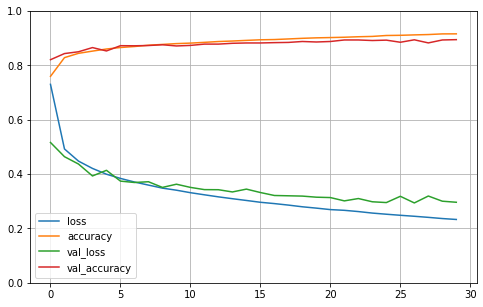

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Test model

In [21]:
model.evaluate(x_test, ytest)

313/313 [==============================] - 2s 3ms/step - loss: 74.4095 - accuracy: 0.8346


[74.40951538085938, 0.8345999717712402]

In [23]:
x_new=x_test[:3]
y_proba=model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 26ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)